In [15]:
from pycollisiondb.pycollisiondb import PyCollision
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
DB_URL = 'https://db-amdis.org/collisiondb/'
#DB_URL = 'http://127.0.0.1:8282/'
#DB_URL = 'http://127.0.0.1:8383/'
#DB_URL = 'https://db-amdis.org/aladdin2/'

In [2]:
pks = [102563, 102564, 102565, 102566, 102567,
       102613, 102614, 102615, 102616, 102617,
       102618, 102619, 102620, 102621, 102622]

In [3]:
query = {'pks': pks}
pycoll = PyCollision.get_datasets(query=query, DB_URL=DB_URL)

In [4]:
len(pycoll.datasets)

15

In [5]:
pycoll.datasets

{102563: D102563: H+ + H 1s → H 1s + H+,
 102564: D102564: H+ + H 1s → H 2s + H+,
 102565: D102565: H+ + H 1s → H 3s + H+,
 102566: D102566: H+ + H 1s → H 4s + H+,
 102567: D102567: H+ + H 1s → H 5s + H+,
 102613: D102613: H+ + H 1s → H 2p + H+,
 102614: D102614: H+ + H 1s → H 3p + H+,
 102615: D102615: H+ + H 1s → H 4p + H+,
 102616: D102616: H+ + H 1s → H 5p + H+,
 102617: D102617: H+ + H 1s → H 3d + H+,
 102618: D102618: H+ + H 1s → H 4d + H+,
 102619: D102619: H+ + H 1s → H 5d + H+,
 102620: D102620: H+ + H 1s → H 4f + H+,
 102621: D102621: H+ + H 1s → H 5f + H+,
 102622: D102622: H+ + H 1s → H 5g + H+}

In [19]:
_ds = pycoll.datasets[102563]
x, y, var = _ds.x, np.zeros_like(_ds.x), np.zeros_like(_ds.x)
for ds in pycoll.datasets.values():
    assert np.allclose(ds.x, x)
    assert np.allclose(ds.unc_lo, ds.unc_lo)
    y += ds.y
    var += ds.unc_lo**2
unc = np.sqrt(var)
x, y, unc

(array([  1000.,   4000.,   9000.,  16000.,  25000.,  36000.,  49000.,
         64000.,  81000., 100000.]),
 array([1.74174649e-15, 1.18870692e-15, 9.17270020e-16, 6.41149250e-16,
        3.86888077e-16, 2.05423314e-16, 1.00334080e-16, 4.66442240e-17,
        2.19842450e-17, 1.06362870e-17]),
 array([5.58805820e-16, 1.63981845e-16, 1.19735277e-16, 9.82281197e-17,
        1.29050827e-16, 1.41597184e-16, 9.77386438e-17, 1.17811362e-16,
        2.00937561e-16, 1.64280204e-16]))

<IPython.core.display.Javascript object>


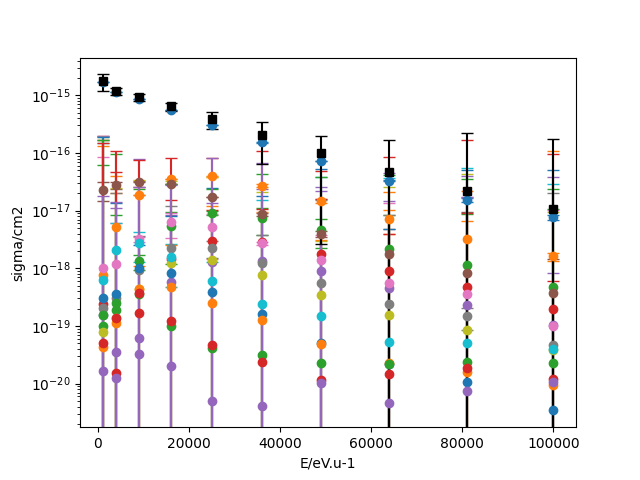

<ErrorbarContainer object of 3 artists>

In [33]:
fig, ax = plt.subplots()
pycoll.plot_all_datasets(ax)
ax.errorbar(x, y, unc, marker='s', ls='', mfc='k', mec='k', ecolor='k', capsize=4)

In [32]:
for xx, yy, yerr in zip(x, y, unc):
    print(f'{xx:8.1f}  {yy:9.3e}:{yerr:9.3e}')

  1000.0  1.742e-15:5.588e-16
  4000.0  1.189e-15:1.640e-16
  9000.0  9.173e-16:1.197e-16
 16000.0  6.411e-16:9.823e-17
 25000.0  3.869e-16:1.291e-16
 36000.0  2.054e-16:1.416e-16
 49000.0  1.003e-16:9.774e-17
 64000.0  4.664e-17:1.178e-16
 81000.0  2.198e-17:2.009e-16
100000.0  1.064e-17:1.643e-16


In [36]:
for ds in pycoll.datasets.values():
    print(ds.y)
    print(ds.unc_lo)

[1.715e-15 1.151e-15 8.558e-16 5.571e-16 3.069e-16 1.527e-16 7.202e-17
 3.315e-17 1.533e-17 7.602e-18]
[6.2e-19 3.4e-19 1.5e-19 4.4e-19 1.1e-18 1.1e-18 5.4e-19 8.7e-19 1.4e-18
 8.3e-19]
[7.713e-19 5.187e-18 1.845e-17 3.474e-17 3.930e-17 2.721e-17 1.454e-17
 7.137e-18 3.279e-18 1.608e-18]
[1.3e-16 1.5e-17 7.7e-21 4.8e-20 4.1e-19 1.6e-18 1.2e-18 3.2e-18 3.4e-18
 2.5e-19]
[9.863e-20 1.868e-19 1.317e-18 5.381e-18 9.070e-18 7.421e-18 4.626e-18
 2.186e-18 1.140e-18 4.670e-19]
[6.2e-17 9.6e-17 4.0e-19 4.2e-18 7.1e-19 3.7e-18 2.4e-18 6.1e-18 7.5e-18
 1.0e-17]
[2.377e-19 1.545e-20 1.654e-19 1.449e-18 3.001e-18 2.816e-18 1.755e-18
 8.812e-19 4.706e-19 1.977e-19]
[2.0e-16 1.1e-16 2.5e-17 1.4e-17 7.1e-18 8.0e-18 1.4e-17 3.1e-18 8.7e-18
 4.0e-19]
[1.568e-19 1.270e-20 3.310e-20 5.703e-19 1.299e-18 1.357e-18 8.887e-19
 4.518e-19 2.330e-19 1.029e-19]
[2.0e-16 1.1e-17 7.7e-17 7.9e-18 1.2e-17 2.2e-17 2.5e-17 1.4e-17 4.0e-17
 7.1e-19]
[2.300e-17 2.774e-17 3.189e-17 2.900e-17 1.724e-17 8.602e-18 3.907e-18